## Исследование данных о продажах компьютерных игр

### Цель исследования:

Выявить закономерности, которые влияют на успешность игры, чтобы спланировать рекламные кампании на 2017 год.

### Ход исследования:

Собранные данные из открытых источников, касательно продаж компьютерных игр я получу из файла /datasets/games.csv. В перую очередь, необходимо ознакомиться с датафреймов и получить первоначальную картину о качестве данных. Далее необходимо выполнить предобработку данных: привести наименования столбцов к змеиному типу, привести данные столбцов к соответствующему типу данных, проверить наличие пропусков/явных и неявных дубликатов, добавить необходимые столбцы для дальнейшего анализа. После предобработки я проведу исследовательский анализ, необходимо визуализировать данные, чтобы сделать интересующие для компании выводы, а именно какие закономерности влияют на продажи. 

Отдельно составлю портрет пользователя каждого региона, так как для каждого региона будет свой рейтинг по играм, соответственно рекламная кампания будет разная. В конце анализа проверю гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action и Sports разные.

Таким образом, моё исследование пройдет в пять этапов:
1. Обзор данных датафрейма
2. Предобработка данных
3. Визуализация данных
4. Составление портрета пользователей по регионам
5. Проверка гипотез

## Этап №1: Обзор данных датафрейма

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
#импортируем необходимые библиотеки для дальнейшего анализа
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import missingno as msno
import seaborn as sns

In [3]:
#загружаем датафрейм 
df = pd.read_csv('/datasets/games.csv')

In [4]:
#изучим общие данные датафрейма
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Из общих данных видно, что в шести столбцах имеются пропуски.

In [5]:
#выведем на экран первые пять строк датафрейма
display(df.head(5))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Необходимо привести наименование столбцов к змеиному типу и изменить тип данных в столбцах:

year_of_release (int), user_score (float)

## Этап №2: Предобработка данных

In [6]:
#приведу наименования стобцов к нижнему регистру
df.columns = df.columns.str.lower()
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


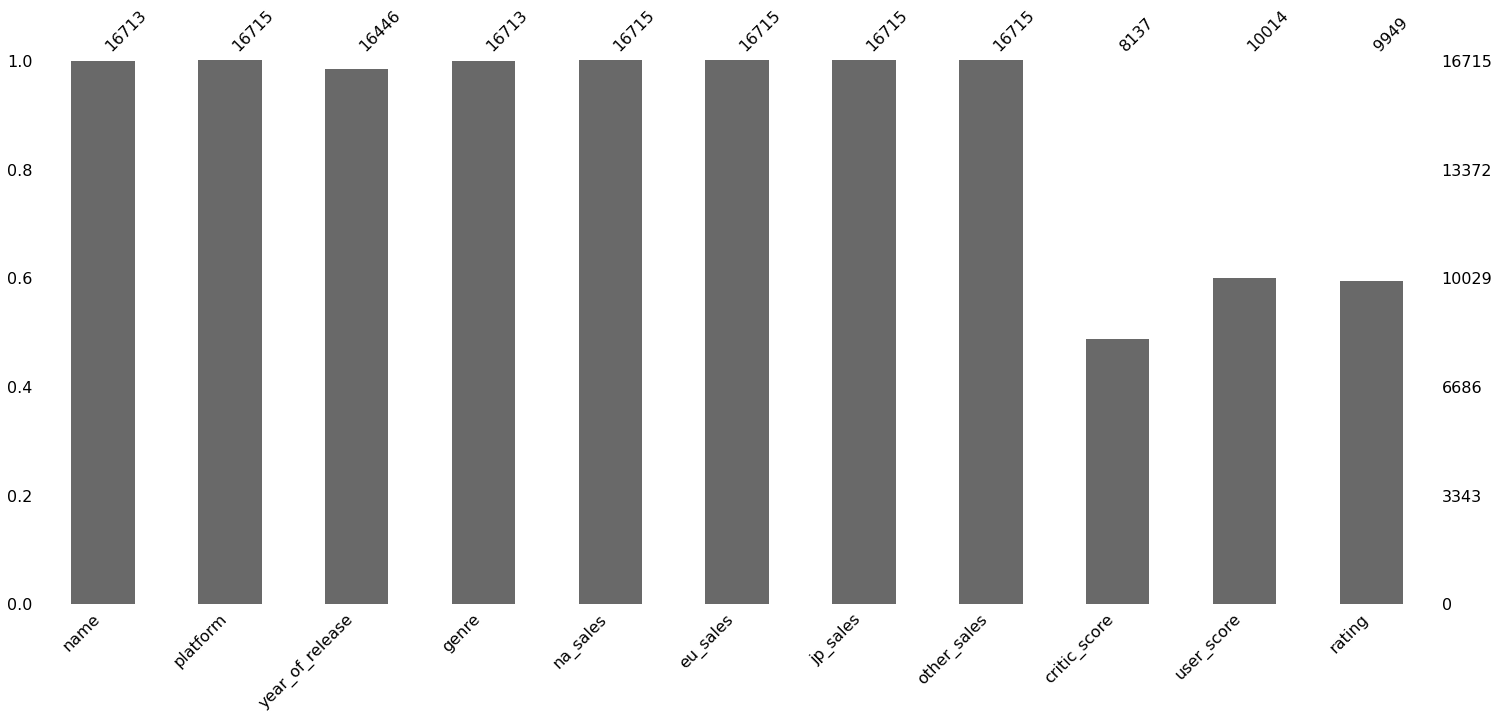

In [7]:
#визуализируем пропуска в датафрейме
msno.bar(df)
plt.show()

Из графика мы видим количество пропусков в каждом столбце и подробнее изучив значения каждого, мы примем решение какую делать замену пропусков.

In [8]:
#заменим пропуски в первом столбце на no_name
df['name'] = df['name'].fillna('no_name')

In [9]:
#проверим игры на уникальные значения
df['name'].sort_values()

14983                  Beyblade Burst
1079                Fire Emblem Fates
3862             Frozen: Olaf's Quest
3358             Frozen: Olaf's Quest
13794      Haikyu!! Cross Team Match!
                     ...             
645                      uDraw Studio
8280     uDraw Studio: Instant Artist
15612    uDraw Studio: Instant Artist
475        wwe Smackdown vs. Raw 2006
9134     ¡Shin Chan Flipa en colores!
Name: name, Length: 16715, dtype: object

Как видим наименование игр дублируются, посмотрим на них.

In [10]:
df.query('name == "uDraw Studio: Instant Artist"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
8280,uDraw Studio: Instant Artist,Wii,2011.0,Misc,0.06,0.09,0.0,0.02,NaN,tbd,E
15612,uDraw Studio: Instant Artist,X360,2011.0,Misc,0.01,0.01,0.0,0.00,54.0,5.7,E


Видно, что игры выходят на разных платформах, с разным рейтингом, по этому могут повторятся. Переходим к проверке другого столбца.

In [11]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Здесь мы видим список моделей игровых консолей, неявных дубликатов не выявлено.

In [12]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Данные пропуски мы не можем заполнить медианной или средним значением, так как это будет недостоверная информация, по этому заменим на нули и приведём тип данных к целому виду.

In [13]:
df['year_of_release'] = df['year_of_release'].fillna(0)
df['year_of_release'] = df['year_of_release'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


В жанре выявлено всего два пропуска. Можно проверить информацию в интернете и заполнить вручную, но сначала проверим уникальные значения столбца.

In [14]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [15]:
#выведем на экран строки с пропусками
df[df['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,no_name,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,no_name,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


По этим играм практически нет никакой информации, считаю лучше удалить данные строки.

In [16]:
df = df.drop([659,14244])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Посмотрим теперь на столбцы с продажами по регионам.

In [17]:
df['na_sales'].apply(lambda x: format(x, 'f')).unique()

array(['41.360000', '29.080000', '15.680000', '15.610000', '11.270000',
       '23.200000', '11.280000', '13.960000', '14.440000', '26.930000',
       '9.050000', '9.710000', '9.000000', '8.920000', '15.000000',
       '9.010000', '7.020000', '9.430000', '12.780000', '4.740000',
       '6.380000', '10.830000', '9.540000', '9.660000', '8.410000',
       '6.060000', '3.430000', '5.510000', '6.850000', '9.040000',
       '5.890000', '6.030000', '9.700000', '5.280000', '4.990000',
       '8.250000', '8.520000', '5.540000', '6.990000', '6.620000',
       '5.030000', '5.990000', '3.960000', '2.500000', '7.970000',
       '6.910000', '4.340000', '4.350000', '3.010000', '6.160000',
       '6.760000', '4.020000', '4.890000', '2.960000', '4.760000',
       '5.010000', '6.730000', '5.950000', '3.660000', '5.550000',
       '7.040000', '6.650000', '3.880000', '5.800000', '4.100000',
       '5.930000', '4.360000', '5.700000', '2.030000', '4.400000',
       '5.050000', '3.540000', '1.120000', '6.820

In [18]:
df['eu_sales'].apply(lambda x: format(x, 'f')).unique()

array(['28.960000', '3.580000', '12.760000', '10.930000', '8.890000',
       '2.260000', '9.140000', '9.180000', '6.940000', '0.630000',
       '10.950000', '7.470000', '6.180000', '8.030000', '4.890000',
       '8.490000', '9.090000', '0.400000', '3.750000', '9.200000',
       '4.460000', '2.710000', '3.440000', '5.140000', '5.490000',
       '3.900000', '5.350000', '3.170000', '5.090000', '4.240000',
       '5.040000', '5.860000', '3.680000', '4.190000', '5.730000',
       '3.590000', '4.510000', '2.550000', '4.020000', '4.370000',
       '6.310000', '3.450000', '2.810000', '2.850000', '3.490000',
       '0.010000', '3.350000', '2.040000', '3.070000', '3.870000',
       '3.000000', '4.820000', '3.640000', '2.150000', '3.690000',
       '2.650000', '2.560000', '3.110000', '3.140000', '1.940000',
       '1.950000', '2.470000', '2.280000', '3.420000', '3.630000',
       '2.360000', '1.710000', '1.850000', '2.790000', '1.240000',
       '6.120000', '1.530000', '3.470000', '2.240000', '5.

In [19]:
df['jp_sales'].apply(lambda x: format(x, 'f')).unique()

array(['3.770000', '6.810000', '3.790000', '3.280000', '10.220000',
       '4.220000', '6.500000', '2.930000', '4.700000', '0.280000',
       '1.930000', '4.130000', '7.200000', '3.600000', '0.240000',
       '2.530000', '0.980000', '0.410000', '3.540000', '4.160000',
       '6.040000', '4.180000', '3.840000', '0.060000', '0.470000',
       '5.380000', '5.320000', '5.650000', '1.870000', '0.130000',
       '3.120000', '0.360000', '0.110000', '4.350000', '0.650000',
       '0.070000', '0.080000', '0.490000', '0.300000', '2.660000',
       '2.690000', '0.480000', '0.380000', '5.330000', '1.910000',
       '3.960000', '3.100000', '1.100000', '1.200000', '0.140000',
       '2.540000', '2.140000', '0.810000', '2.120000', '0.440000',
       '3.150000', '1.250000', '0.040000', '0.000000', '2.470000',
       '2.230000', '1.690000', '0.010000', '3.000000', '0.020000',
       '4.390000', '1.980000', '0.100000', '3.810000', '0.050000',
       '2.490000', '1.580000', '3.140000', '2.730000', '0.660

In [20]:
df['other_sales'].apply(lambda x: format(x, 'f')).unique()

array(['8.450000', '0.770000', '3.290000', '2.950000', '1.000000',
       '0.580000', '2.880000', '2.840000', '2.240000', '0.470000',
       '2.740000', '1.900000', '0.710000', '2.150000', '1.690000',
       '1.770000', '3.960000', '10.570000', '0.550000', '2.040000',
       '1.360000', '0.420000', '0.460000', '1.410000', '1.780000',
       '0.500000', '1.180000', '0.800000', '1.160000', '1.320000',
       '0.590000', '2.380000', '1.130000', '0.780000', '2.420000',
       '1.120000', '1.280000', '1.570000', '1.300000', '1.010000',
       '0.910000', '1.790000', '1.970000', '0.860000', '1.210000',
       '0.230000', '0.760000', '0.740000', '7.530000', '0.290000',
       '1.030000', '0.520000', '2.110000', '1.600000', '1.610000',
       '0.350000', '0.970000', '1.060000', '0.630000', '0.150000',
       '0.790000', '0.960000', '1.250000', '0.900000', '0.810000',
       '0.390000', '0.680000', '0.850000', '0.180000', '0.080000',
       '0.670000', '0.700000', '0.410000', '0.330000', '0.600

Так как данные в данных столбцах приведены в миллионах, то ничего необычного нет, никаких аномалий.

Перейдём к проверке столбцов с оценками к игре.

In [21]:
#выведем уникальные значения
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [22]:
#ознакомимся с пропусками
df[df['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В данном столбце очень много пропусков, практически 50%. Судя по таблице, пока вижу две причины их присутствия:
    1. Старые игры для консолей Nintendo
    2. Низкие продажи игры, не превышающие 1 млн. копий.
    
Учитывая такое количество пропусков, оставим их как есть.

In [23]:
#выведем уникальные значения
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [24]:
#ознакомимся с пропусками
df[df['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


С пропусками в оценке пользователей, обстоит та же ситуация, что и с оценкой критиков, пропусков очень много. По десятибальной шкале мы видим еще оценку tbd, т.е. игра еще в процессе оценки у пользователей, по этому рейтинга по сути еще нет. Думаю стоит tbd заменить на пропуск и привести столбец к типу данных float с помощью метода to_numeric().

In [25]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [26]:
#проверяем теперь количество пропусков и тип данных столбца user_score
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [27]:
#выведем уникальные значения столбца рейтинг
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Неявных дубликатов нет, но пропусков слишком много - заменим их на no_information

In [28]:
df['rating'] = df['rating'].fillna('no_information')

In [29]:
#проверим датафрейм после обработки пропусков
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Всё верно, остались пропуска в столбцах critic_score and user_score, данные которые мы не можем восстановить.

Теперь добавим новый столбец в датафрейм и посчитаем суммарную продажу для каждой игры.

In [30]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
display(df.head(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_information,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_information,31.38


###### Промежуточный вывод: при обработке данных датафрейма, мы увидили много пропусков в столбцах с оценкой критиков, пользователей и возрастным рейтингом. После того как мы вывели на экран данные пропуска, увидили закономерности, что их много в играх, которые вышли до 2000 года на консолях Nintendo, а также те, которые не превысели продажи в 1 млн.копий. Также мы видим, что в датафрейме большая база игр, начиная с 1980 года, для анализа на будущий год, нам явно не понадобятся такие данные.

## Этап №3: Исследовательский анализ

Визуализируем данные, чтобы сделать выводы для дальнейшего анализа.

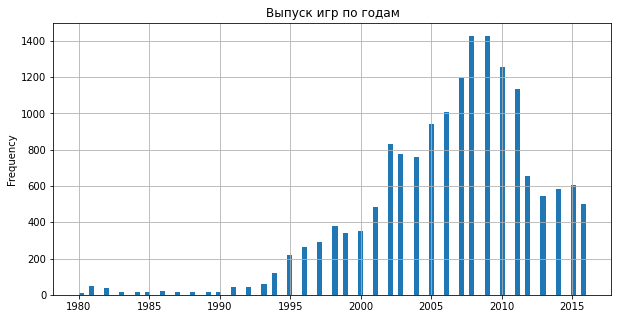

In [31]:
df['year_of_release'].plot(kind='hist', bins=100, title='Выпуск игр по годам', figsize=(10,5), range=(1980, 2016), grid=True)
plt.show()

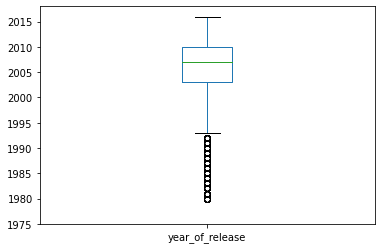

In [32]:
df['year_of_release'].plot(kind='box')
plt.ylim(1975,2018)
plt.show()

Из графика видим, что с 1995 года начался рост продаж видеоигр, по этому можем удалить выбросы, которые находятся до 1995 года.

In [33]:
df = df.query('year_of_release >= 1995')

In [34]:
#проверим какое количество данных осталось
len(df) / 16713

0.9548255848740501

Посмотрим как менялись продажи с временем по всем платформам.

In [35]:
#создадим сводную таблицу с необходимыми данными
platform_grouped = pd.pivot_table(df,
                                 index= 'year_of_release',
                                 columns = 'platform',
                                 values='total_sales',
                                 aggfunc='sum'
                                 )


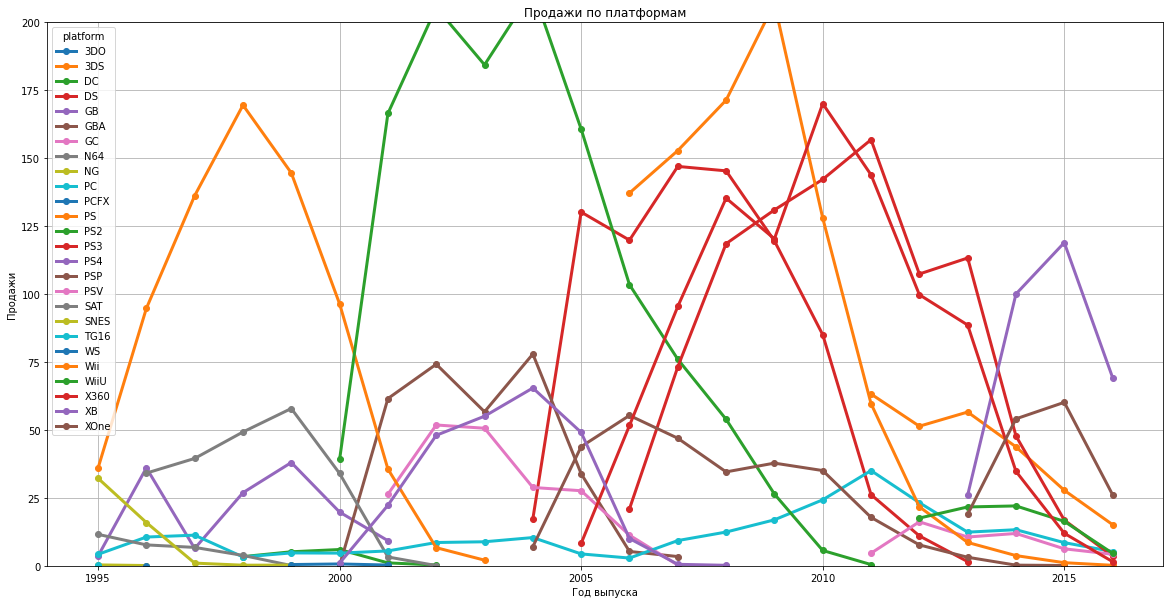

In [36]:
platform_grouped.plot(figsize=(20,10), ylim=(0,200), grid=True, title='Продажи по платформам', style='o-', linewidth=3, xlabel="Год выпуска", ylabel="Продажи")
plt.show()

Из графика сразу видно какие платформы имеют наибольшие продажи: Wii, PS2, PS, DS, PS и соответственно эти платформы продержались на рынке дольше, чем платформы, которые имеют низкие продажи. Также из графика видно, что платформы, которые имеют низкие продажи на рынке существуют в среднем пять лет, и на смену им появляются новые консоли. Из графика только сильно выбивается платформа PC, на которой постоянно выходят игры, но продажи весьма низкие.

In [37]:
#посмотрим топ-5 платформ по самым высоким продажам за весь период
top5 = pd.pivot_table(df,
                      index= 'platform',
                      values='total_sales',
                      aggfunc='sum'
                     ).reset_index().sort_values(by='total_sales', ascending=False)
top5.head()

,platform,total_sales
12,PS2,1233.56
23,X360,961.24
13,PS3,931.34
21,Wii,891.18
3,DS,802.76


PS2 лидирует, с 2000 по 2011 год для платформы было продано 1 миллиард игр.

Посмотрим как распределяются продажи по годам для топ-5 платформ.

In [38]:
#создадим список для топ-5 платформ
top_list = ['PS2', 'X360', 'Wii', 'PS3', 'DS']

#отфильтруем исходную таблицу
top_data = df.query('platform in @top_list')

#создадим сводную таблицу для топ-5 платформ
top_pivot = pd.pivot_table(top_data,
                           index= 'year_of_release',
                           columns = 'platform',
                           values='total_sales',
                           aggfunc='sum'
                          )

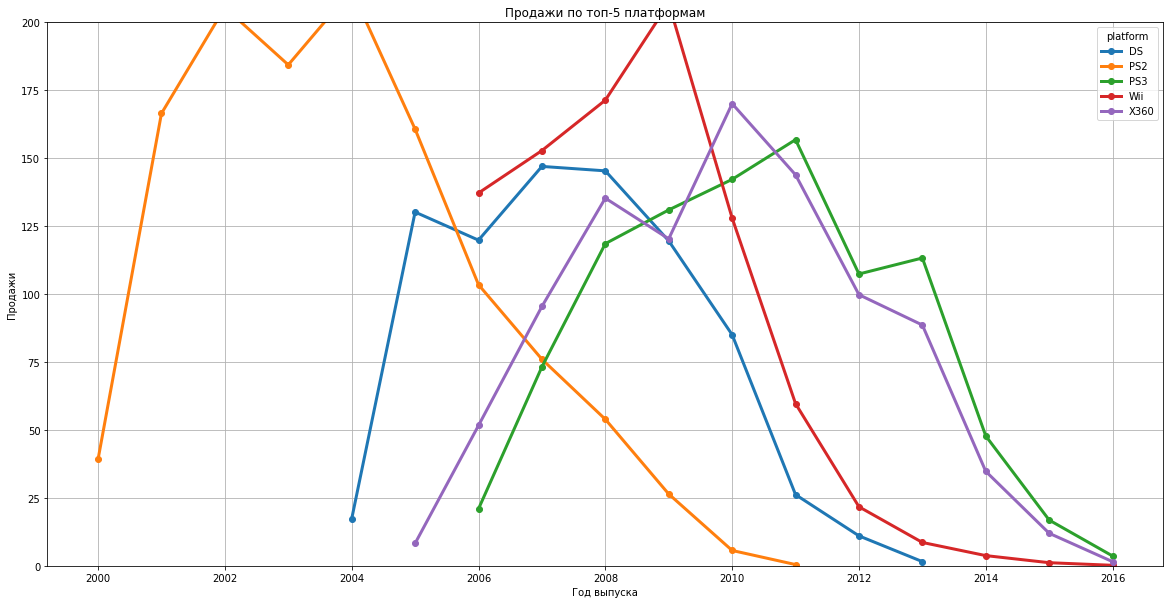

In [39]:
top_pivot.plot(figsize=(20,10), ylim=(0,200), grid=True, title='Продажи по топ-5 платформам', style='o-', linewidth=3, xlabel="Год выпуска", ylabel="Продажи")
plt.show()

Несмотря на то, что данные платформы находятся в топ-5 по продажам, мы видим, что игры перестали выпускатся для PS-2 в 2011 году, для DS в 2013 года, для платформы Wii продажи начали резко падать с 2009 года, а для X360 и PS3 с 2013 года. 

Это говорит о том, что на рынке появились более новые платформы, продажи которых только начали расти. 

Если мы посмотрим на первоначальный график, то увидим, что с 2013 года продажи начали расти у таких платформ как: PS4 и XOne. 

В связи с этим, можем сделать вывод: что данные ранее 2013 года не стоит учитывать для нашего анализа, чтобы планировать рекламную кампанию на 2017 год, так как многие платформы уже устарели и не пользуются большим спросом у пользователей.

Отфильтруем исходный датафрейм с 2013 по 2016 год включительно, который будет у нас для работы прогнозирования на 2017 год. 

In [40]:
plan_for_2017 = df.query('year_of_release >= 2013')
display(plan_for_2017)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_information,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_information,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_information,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,no_information,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_information,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_information,0.01


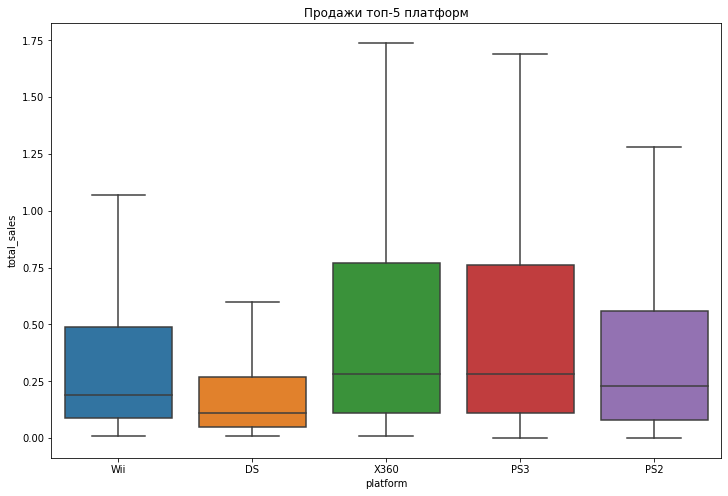

In [94]:
#построим "ящик с усами" для топ-5 платформ
plt.figure(figsize=(12,8))
sns.boxplot(x='platform', y='total_sales', data = top_data, showfliers=False)
plt.title('Продажи топ-5 платформ')
plt.show()

Из графика мы видим расспределение продаж для топ-5 платформ: XBox 360 и PlayStation 3 имеют наибольшие продажи и их медиана превышает в 250 000 копий. 

Сейчас посмотрим как влияют на продажи оценка критиков и пользователей, в одной из самых популярных платформ Nintendo Wii.

Для этого посчитаем корреляцию и построим диаграмму рассеяния.

In [42]:
#отфильтруем датафрейм по необходимой платформе
nintendo = df.query('platform == "Wii"')

In [43]:
print('Корреляция между оценкой пользователей и продажами составляет:', nintendo['user_score'].corr(nintendo['total_sales']))
print('Корреляция между оценкой критиков и продажами составляет:', nintendo['critic_score'].corr(nintendo['total_sales']))

Корреляция между оценкой пользователей и продажами составляет: 0.11283121360773772
Корреляция между оценкой критиков и продажами составляет: 0.17790728577594908


Как видим в одной из самой популярной платформы, оценка критиков и пользователей никак не влият на продажи.

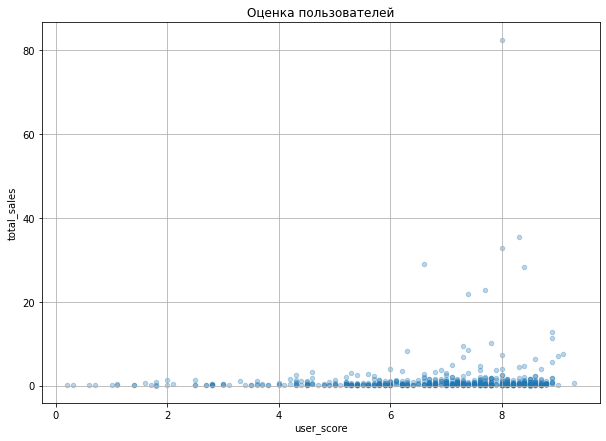

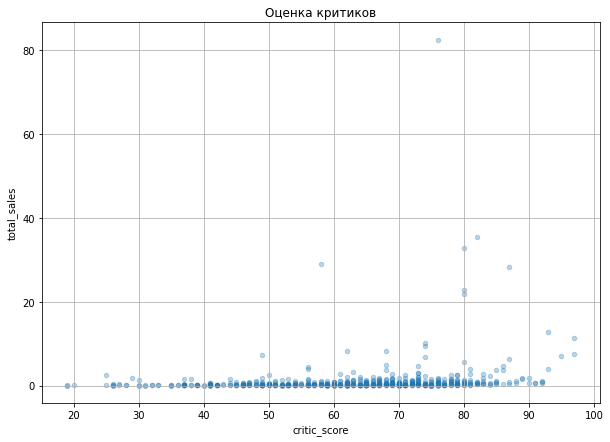

In [44]:
nintendo.plot(x='user_score', y='total_sales', kind='scatter', grid=True, figsize=(10,7), alpha=0.3, title='Оценка пользователей')
plt.show()
nintendo.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, figsize=(10,7), alpha=0.3, title='Оценка критиков')
plt.show()

Вот и диаграмма рассеяния нам показала, что никакой зависимости нет между оценками игры и их продажами.

Но это мы делали для одной платформы, посмотрим ту же зависимость только для других платформ, кроме Nintendo Wii.

In [45]:
#отфильтруем датафрем исключая платформу Wii
other = df.query('platform != "Wii"')

In [46]:
print('Корреляция между оценкой пользователей и продажами составляет:', other['user_score'].corr(other['total_sales']))
print('Корреляция между оценкой критиков и продажами составляет:', other['critic_score'].corr(other['total_sales']))

Корреляция между оценкой пользователей и продажами составляет: 0.10064904966300672
Корреляция между оценкой критиков и продажами составляет: 0.31796313587587494


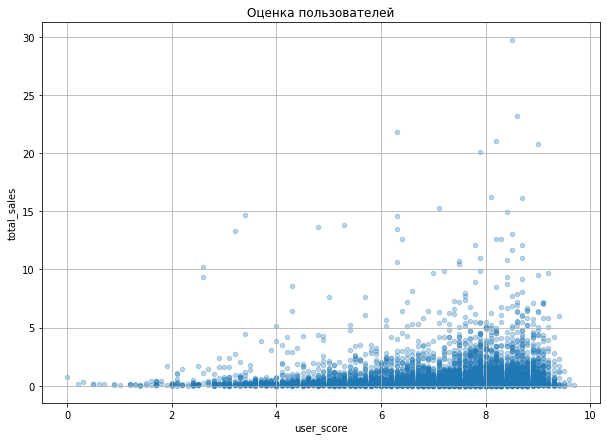

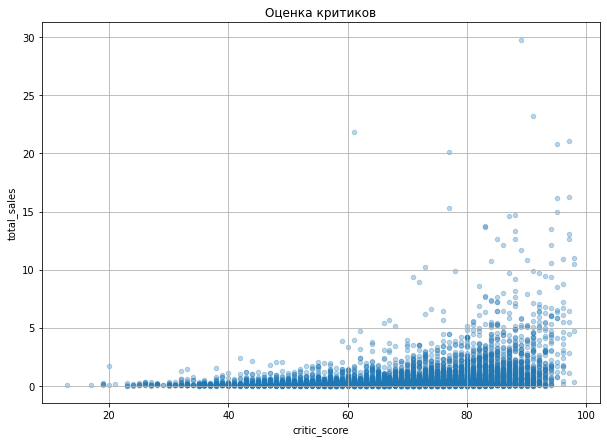

In [47]:
other.plot(x='user_score', y='total_sales', kind='scatter', grid=True, figsize=(10,7), alpha=0.3, title='Оценка пользователей')
plt.show()
other.plot(x='critic_score', y='total_sales', kind='scatter', grid=True, figsize=(10,7), alpha=0.3, title='Оценка критиков')
plt.show()

Здесь также зависимость продаж от оценки критиков и пользоваталей крайне низкая, можно сделать вывод, что оценки не влияют на количество продаж.

Посмотрим какие жанры самые популярные.

In [48]:
genre = df['genre'].value_counts()
genre

Action          3222
Sports          2238
Misc            1701
Role-Playing    1434
Adventure       1280
Shooter         1247
Racing          1203
Simulation       842
Platform         808
Fighting         792
Strategy         658
Puzzle           533
Name: genre, dtype: int64

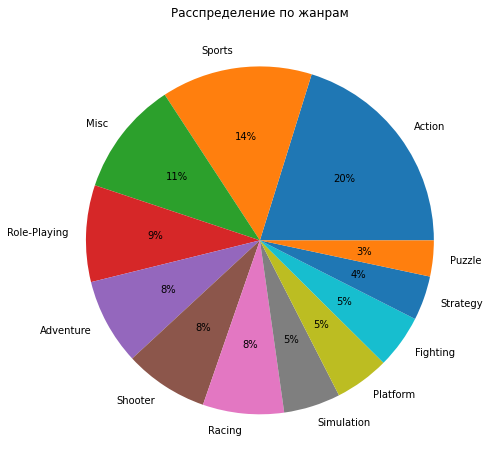

In [49]:
genre.plot(kind='pie', title='Расспределение по жанрам', figsize=(10,8), autopct='%1.0f%%')
plt.ylabel('')
plt.show()

Можем выделить самые популярные жанры игр:
1. Action
2. Sports
3. Misc

Теперь посмотрим на самые прибыльные жанры.

In [95]:
#сгруппируем таблицу по жанрам и посчитаем общие продажи для каждого
sales = df.groupby('genre').agg({'total_sales':'median'}).sort_values(by='total_sales', ascending=False)

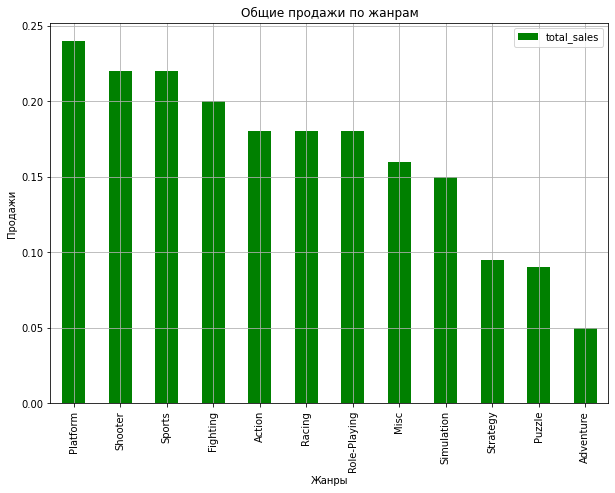

In [96]:
sales.plot(kind='bar', grid=True, figsize=(10,7), title='Общие продажи по жанрам', xlabel='Жанры', ylabel='Продажи', color='green')
plt.show()

Из графика можем выделить самые прибыльные жанры: Platform, Shooter, Sports, Fighting.

##### Промежуточный вывод: После того как мы визуализировали данные, мы увидели, что платформы, у которых были низкие продажи быстро уходили с рынка (кроме PC), в среднем где-то пять лет; на смену постоянно приходят новые платформы, что вызывает сразу резкий скачок в продажах игр. Мы выделили топ-5 платформ: PlayStation 2, XBox 360,  Nintendo Wii,  PlayStation 3, Nintendo DS. Провели исследование и выявили, что оценка критиков и пользователей не влияет на глобальные продажи. Определили самые популярные жанры: Action, Sports, Misc и самые прибыльные жанры - Action, Sports, Shotter, Role-Playing, Misc. Эти выводы послужат нам для дальнейшего планирования рекламной кампании на 2017 год. Учитывая, что продажи падают на старых платформах, а на новых растут, мы для анализа возьмем датафрейм за период с 2013-2016 год включительно.

## Этап №4: Составление портрета пользователя по регионам

У нас есть три региона: Северная Америка, Европа, Япония и другие. Проведем для каждого региона свой анализ и сможем составить для каждого портрет пользователя.

##### Северная Америка:

In [52]:
#найдём топ-5 популярных платформ, для начала сгруппируем данные
na_platform = plan_for_2017.groupby('platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)[:5]
na_platform

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


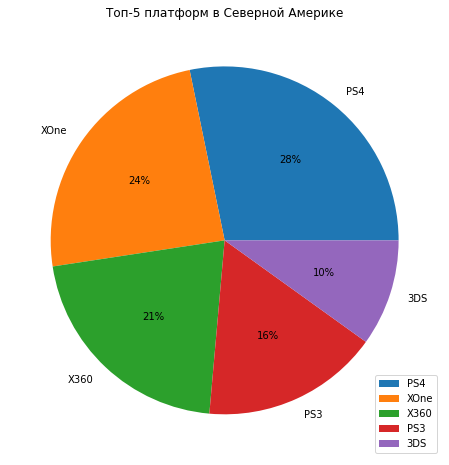

In [53]:
#построим для топ-5 платформ круговую диаграмму, что увидеть процентное расспределение
na_platform.plot(y='na_sales', kind='pie', title='Топ-5 платформ в Северной Америке', figsize=(10,8), autopct='%1.0f%%')
plt.ylabel('')
plt.show()

28% и 24% процента продаж приходятся на платформы PS4 и Xone, что является логичным, так как эти модели более новые чем остальные. Также в Северной Америке пользуется популярностью XBox 360, это можно обьяснить тем, что их производят в США.

In [54]:
#найдём топ-5 популярных жанров, для начала сгруппируем данные
na_genre = plan_for_2017.groupby('genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False)[:5]
na_genre

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


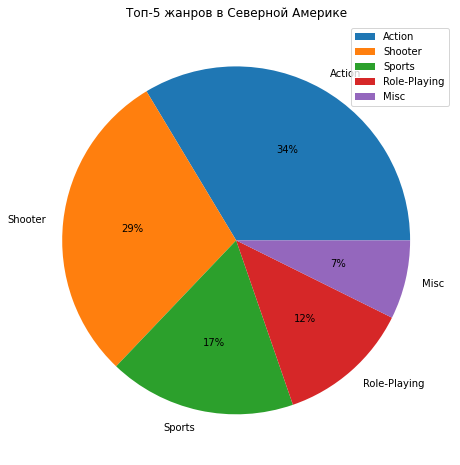

In [55]:
#построим для топ-5 жанров круговую диаграмму, что увидеть процентное расспределение
na_genre.plot(y='na_sales', kind='pie', title='Топ-5 жанров в Северной Америке', figsize=(10,8), autopct='%1.0f%%')
plt.ylabel('')
plt.show()

Жанр Action лидирует в продажах и составляет 34% от топ-5 жанров.

Посмотирим как рейтинг ESRB влияет на продажи в Северной Америке.

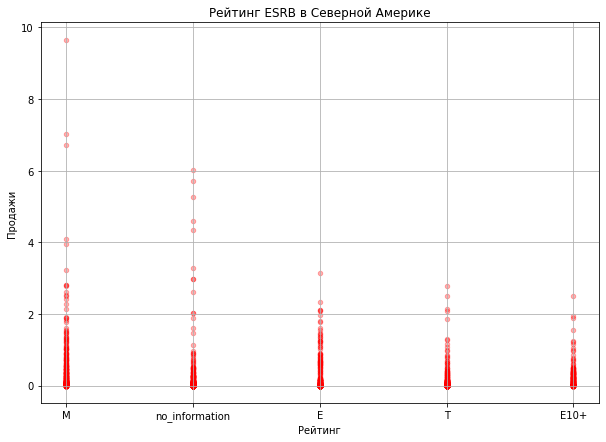

In [56]:
plan_for_2017.plot(x='rating', y='na_sales', kind='scatter', grid=True, figsize=(10,7), alpha=0.3, title='Рейтинг ESRB в Северной Америке', color='red')
plt.ylabel('Продажи')
plt.xlabel('Рейтинг')
plt.show()

Из графика мы видим сильную зависимость продаж от рейтинга, игры для пользователей от 17 лет имеют наибольшие продажи.

##### Портрет пользователя из Северной Америки: это пользователи от 17 лет, которые в основном играют на консолях PlayStation 4 и XBox One в игры в жанре Action, Shooter.

#####  Европа:

In [57]:
#найдём топ-5 популярных платформ, для начала сгруппируем данные
eu_platform = plan_for_2017.groupby('platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)[:5]
eu_platform

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


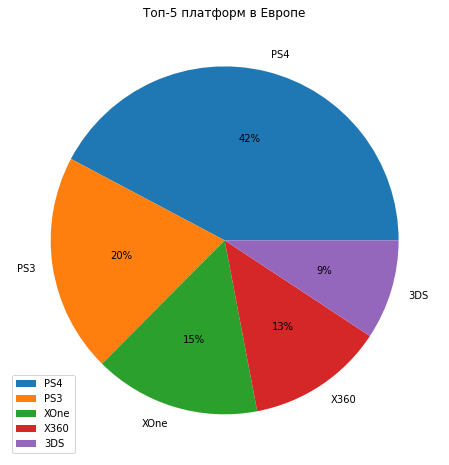

In [58]:
#построим для топ-5 платформ круговую диаграмму, чтобы увидеть процентное расспределение
eu_platform.plot(y='eu_sales', kind='pie', title='Топ-5 платформ в Европе', figsize=(10,8), autopct='%1.0f%%')
plt.ylabel('')
plt.show()

А вот в Европе большей популярностью пользуются консоли PlayStation, которые производятся в Японии. Скорее всего это больше связано с тем, что для консолей PS выпускаются больше экзклюзивных игр чем для XB.

In [59]:
#найдём топ-5 популярных жанров, для начала сгруппируем данные
eu_genre = plan_for_2017.groupby('genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False)[:5]
eu_genre

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


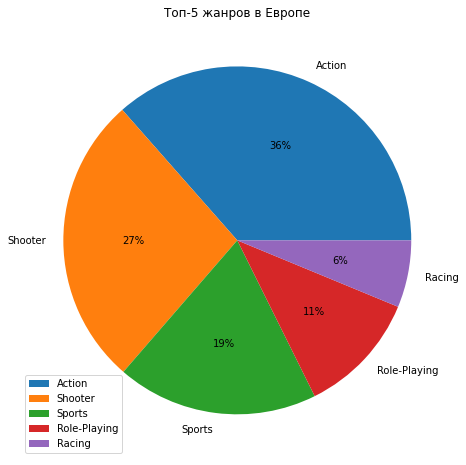

In [60]:
#построим для топ-5 жанров круговую диаграмму, чтобы увидеть процентное расспределение
eu_genre.plot(y='eu_sales', kind='pie', title='Топ-5 жанров в Европе', figsize=(10,8), autopct='%1.0f%%')
plt.ylabel('')
plt.show()

Здесь также лидируют жанры Action и Shooter.

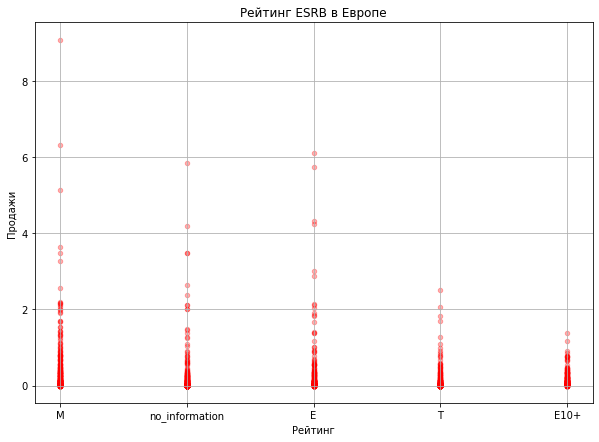

In [61]:
plan_for_2017.plot(x='rating', y='eu_sales', kind='scatter', grid=True, figsize=(10,7), alpha=0.3, title='Рейтинг ESRB в Европе', color='red')
plt.ylabel('Продажи')
plt.xlabel('Рейтинг')
plt.show()

Также видим сильную зависимость продаж от рейтинга, только вот в Европе продается намного больше игр для категории 7+

##### Портрет пользователя из Европы: это пользователи от 17 лет, которые в основном играют на консолях PlayStation 4 и PlayStation 3 в игры в жанре Action, Shooter.

#####  Япония:

In [62]:
#найдём топ-5 популярных платформ, для начала сгруппируем данные
jp_platform = plan_for_2017.groupby('platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)[:5]
jp_platform

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


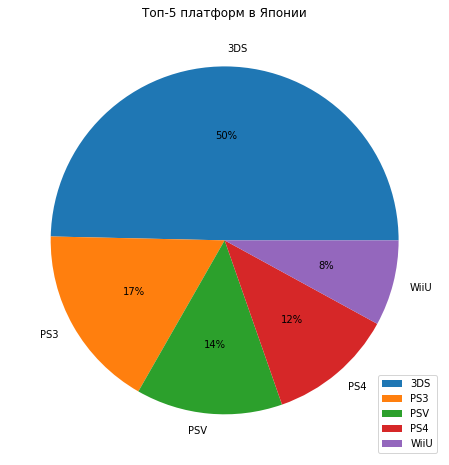

In [63]:
#построим для топ-5 платформ круговую диаграмму, чтобы увидеть процентное расспределение
jp_platform.plot(y='jp_sales', kind='pie', title='Топ-5 платформ в Японии', figsize=(10,8), autopct='%1.0f%%')
plt.ylabel('')
plt.show()

50% занимает портативная консоль Nintendo 3DS! Это можно обосновать тем, что люди в Японии очень много времени тратят в дороге, и тратят это время на прохождение игр. Также Nintendo Switch предоставляет доступ к обширной библиотеке игр, адаптированных для японского рынка.

In [64]:
#найдём топ-5 популярных жанров, для начала сгруппируем данные
jp_genre = plan_for_2017.groupby('genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False)[:5]
jp_genre

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


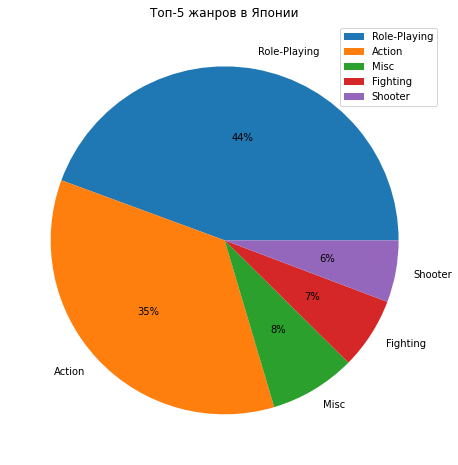

In [65]:
#построим для топ-5 жанров круговую диаграмму, чтобы увидеть процентное расспределение
jp_genre.plot(y='jp_sales', kind='pie', title='Топ-5 жанров в Японии', figsize=(10,8), autopct='%1.0f%%')
plt.ylabel('')
plt.show()

В Японии игроки предпочитают игры Role-Playing, скорее всего это связано с их культурой и популярностью аниме, которую переносят в игровой мир. Восточная культура - дело тонкое.

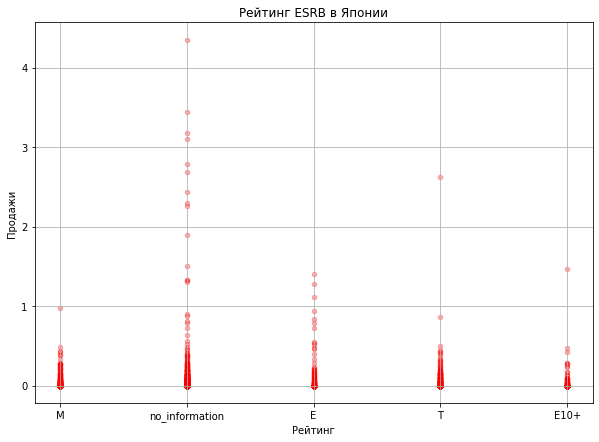

In [66]:
plan_for_2017.plot(x='rating', y='jp_sales', kind='scatter', grid=True, figsize=(10,7), alpha=0.3, title='Рейтинг ESRB в Японии', color='red')
plt.ylabel('Продажи')
plt.xlabel('Рейтинг')
plt.show()

А вот в Японии рейтинг не влияет на продажи, здесь игры продаются в больших объемах как для детей, так и для взрослых. Это неудивительно, так как это страна в которой возникла культура видеоигр.

##### Портрет пользователя из Японии: это пользователь любого возраста, который предпочитает играть на портативной консоли Nintendo 3DS в игры в жанре RPG.

##### Другие регионы:

In [67]:
#найдём топ-5 популярных платформ, для начала сгруппируем данные
other_platform = plan_for_2017.groupby('platform').agg({'other_sales':'sum'}).sort_values(by='other_sales', ascending=False)[:5]
other_platform

,other_sales
platform,
PS4,48.35
PS3,26.77
XOne,14.27
X360,12.11
3DS,6.28


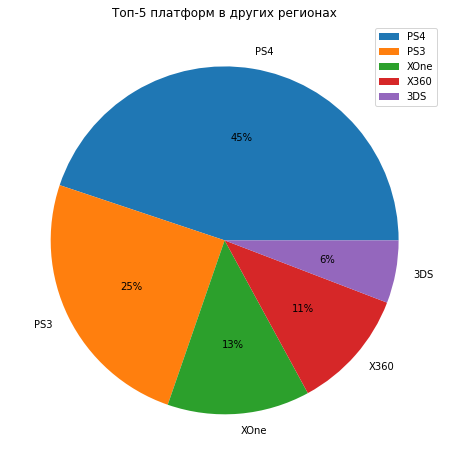

In [68]:
#построим для топ-5 платформ круговую диаграмму, чтобы увидеть процентное расспределение
other_platform.plot(y='other_sales', kind='pie', title='Топ-5 платформ в других регионах', figsize=(10,8), autopct='%1.0f%%')
plt.ylabel('')
plt.show()

В других регионах как и в Европе лидируют в продажах SonyPlaystation. Вывод такой же, для данной платформы больше выходит эксклюзивных видеоигр.

In [69]:
#найдём топ-5 популярных жанров, для начала сгруппируем данные
other_genre = plan_for_2017.groupby('genre').agg({'other_sales':'sum'}).sort_values(by='other_sales', ascending=False)[:5]
other_genre

,other_sales
genre,
Action,37.20
Shooter,28.77
Sports,19.45
Role-Playing,11.48
Misc,6.09


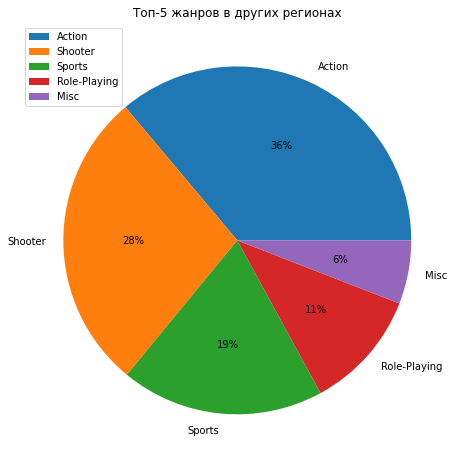

In [70]:
#построим для топ-5 жанров круговую диаграмму, чтобы увидеть процентное расспределение
other_genre.plot(y='other_sales', kind='pie', title='Топ-5 жанров в других регионах', figsize=(10,8), autopct='%1.0f%%')
plt.ylabel('')
plt.show()

Action и Shooter практически захватили весь мир!

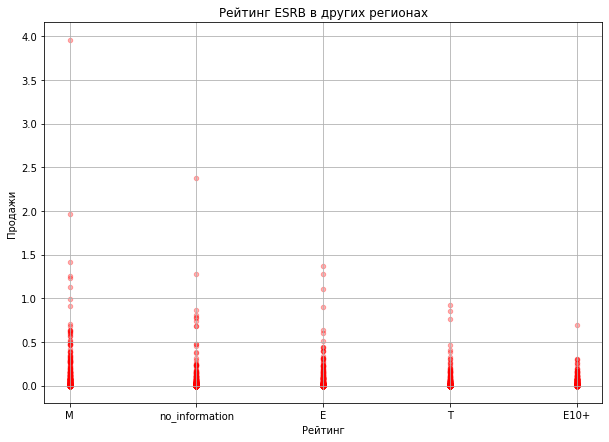

In [71]:
plan_for_2017.plot(x='rating', y='other_sales', kind='scatter', grid=True, figsize=(10,7), alpha=0.3, title='Рейтинг ESRB в других регионах', color='red')
plt.ylabel('Продажи')
plt.xlabel('Рейтинг')
plt.show()

Здесь также сильная зависимость продаж от рейтинга.

##### Портрет пользователя из других регионов: это пользователи от 17 лет, которые в основном играют на консолях PlayStation 4 и PlayStation 3 в игры в жанре Action, Shooter.

## Этап №5: Проверка гипотез

Гипотеза №1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Нулевая гипотеза: Средние пользовательские рейтинги платформы Xbox One равно средним пользовательским рейтингам платформы PC.

Альтернативная гипотеза: Средние пользовательские рейтинги платформы Xbox One НЕ равно средним пользовательским рейтингам платформы PC.

У нас есть генеральная совокупность и две выборки, которые нужно между собой сравнить, по этому применим метод ttest_ind

In [72]:
#создадим две переменные, которые передадим методу ttest_ind
data1 = plan_for_2017.query('platform == "XOne" and user_score >= 0')
data2 = plan_for_2017.query('platform == "PC" and user_score >= 0')

In [73]:
alpha = 0.01
results = st.ttest_ind(
    data1['user_score'],
    data2['user_score'])

print('p-value равно:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Средняя оценка пользователей для платформы XBox One равно:', data1['user_score'].mean().round(2))
print('Средняя оценка пользователей для платформы PC равно:', data2['user_score'].mean().round(2))

p-value равно: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу
Средняя оценка пользователей для платформы XBox One равно: 6.52
Средняя оценка пользователей для платформы PC равно: 6.27


Вывод: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Гипотеза №2: Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза: Средний пользовательский рейтинг жанра Action равно среднему пользовательскому рейтингу жанра Sports.

Альтернативная гипотеза: Средний пользовательский рейтинг жанра Action НЕ равен среднему пользовательскому рейтингу жанра Sports.

In [74]:
#применим тот же метод, создадим две переменные, которые передадим методу ttest_ind
data3 = plan_for_2017.query('genre == "Action" and user_score >= 0')
data4 = plan_for_2017.query('genre == "Sports" and user_score >= 0')

In [75]:
alpha = 0.01
results = st.ttest_ind(
    data3['user_score'],
    data4['user_score'])

print('p-value равно:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
print('Средняя оценка пользователей для жанра Action равно:', data3['user_score'].mean().round(2))
print('Средняя оценка пользователей для жанра Sports равно:', data4['user_score'].mean().round(2))

p-value равно: 1.0517832389140023e-27
Отвергаем нулевую гипотезу
Средняя оценка пользователей для жанра Action равно: 6.84
Средняя оценка пользователей для жанра Sports равно: 5.24


Вывод: cредние пользовательские рейтинги жанров Action и Sports разные.

## Итоговый вывод:

##### Предобработка данных:

В ходе анализа, в шести толбцах были выявлены пропуски: в столбце 'name' пропуски были заменены на 'no_name', в столбце 'year_of_release' на 0, в столбце 'rating' на 'no_information', два пропуска в столбце 'genre' были удалены из датафрейма, так как в них не было необходимой информации для анализа. Пропуски в столбцах 'user_score' и 'critic_score' оставили, они составляют практически 50% и восстановить их нет возможности. В столбце 'user_score' была обнаружена оценка tbd, которая означает, что игра находится в процессе оценки и на момент выгрузки датафрейма её еще нет, по этому было принято решение заменить оценку tbd на пропуск. Также столбцы были приведены к необходимому типу данных для последующего анализа. 

##### Решение задачи:
1. Чтобы подготовить датафрейм к планированию рекламной кампании на 2017 год, мы ознакомились с продажами игр по платформам и годам, и было выявлено, что на рынке, в среднем, каждые 5 лет выходят новые консоли, а на старых продажи останавливаются. По этому мы взяли актуальный период для анализа с 2013 по 2016 года включительно, так как в 2013 году на многих платформах продажи свелись к нулю, а на новых начали расти, а нас как раз интересуют платформы, которые набирают обороты в продажах.
2. Мы определили, что оценка критиков и пользователей не влияет на глобальные продажи. На продажи влияют следующие факторы: платформа, жанр игры, возрастной рейтинг (в зависимости от региона).

##### Рекомендации по составлению рекламной кампании:
Рекламная кампания должна быть поделена на четыре региона и должна учитывать следующие факторы:
1. Реклама для Северной Америки: направлена на пользователей старше 17 лет, которые пользуются или планируют покупку консолей: PlayStation 4, XBox One, XBox 360. Игры для рекламы должны быть в жанре: Action, Shooter. 
2. Реклама для Европы: направлена на пользователей старше 17 лет, которые пользуются или планируют покупку консолей: PlayStation 4, PlayStation3. Игры для рекламы должны быть в жанре: Action, Shooter. 
3. Реклама для Японии: направлена на пользователей всех возрастов, которые пользуются или планируют покупку консолей: Nintendo 3DS. Игры для рекламы должны быть в жанре: RPG. 
4. Реклама для других регионов: направлена на пользователей старше 17 лет, которые пользуются или планируют покупку консолей: PlayStation 4. Игры для рекламы должны быть в жанре: Action, Shooter. 